# SVD

This notebook illustrates the embedding of a graph by the [singular value decomposition](https://scikit-network.readthedocs.io/en/latest/reference/embedding.html#svd) of the adjacency (or biadjacency) matrix.

In [1]:
import numpy as np

In [2]:
import sknetwork as skn

## Undirected graphs

**Loading**

In [3]:
adjacency, labels = skn.toy_graphs.karate_club(return_labels=True)
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Embedding**

In [4]:
svd = skn.embedding.SVD()
svd.fit(adjacency)

SVD(embedding_dimension=2, weights='degree', feature_weights='degree', regularization=0.01, energy_scaling=True, solver=LanczosSVD())

In [5]:
embedding = svd.embedding_
embedding.shape

(34, 2)

**Visualization**

In [6]:
from networkx import from_scipy_sparse_matrix, draw

In [7]:
graph = from_scipy_sparse_matrix(adjacency)

In [8]:
colors = ['r','b']

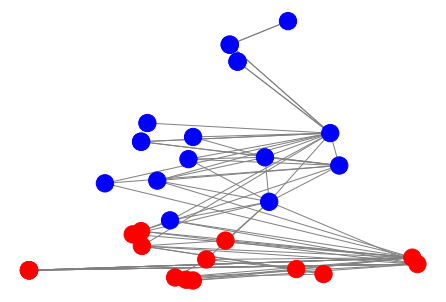

In [10]:
draw(graph, pos = embedding, node_color = [colors[l] for l in labels], edge_color = 'grey')

**Metrics**

In [11]:
skn.embedding.dot_modularity(adjacency, embedding)

0.38189731580137437

**Parameters**

In [12]:
# embedding dimension
svd = skn.embedding.SVD(embedding_dimension=10)
svd.fit(adjacency)

SVD(embedding_dimension=10, weights='degree', feature_weights='degree', regularization=0.01, energy_scaling=True, solver=LanczosSVD())

In [13]:
# regularization
svd = skn.embedding.SVD(regularization=1)
svd.fit(adjacency)

SVD(embedding_dimension=2, weights='degree', feature_weights='degree', regularization=1, energy_scaling=True, solver=LanczosSVD())

In [14]:
# solver
svd = skn.embedding.SVD(solver='halko')
svd.fit(adjacency)

SVD(embedding_dimension=2, weights='degree', feature_weights='degree', regularization=0.01, energy_scaling=True, solver=HalkoSVD(n_oversamples=10, n_iter='auto', transpose='auto', power_iteration_normalizer='auto', flip_sign=True))

## Directed graphs

**Loading**

In [15]:
adjacency, names = skn.toy_graphs.painters(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Embedding**

In [16]:
# embedding of the graph considered as bipartite (each node considered twice)
svd = skn.embedding.SVD()
svd.fit(adjacency)

SVD(embedding_dimension=2, weights='degree', feature_weights='degree', regularization=0.01, energy_scaling=True, solver=LanczosSVD())

In [17]:
embedding = svd.embedding_
embedding.shape

(14, 2)

**Visualization**

In [18]:
from networkx import from_scipy_sparse_matrix, draw, DiGraph

In [19]:
graph = from_scipy_sparse_matrix(adjacency,create_using=DiGraph())

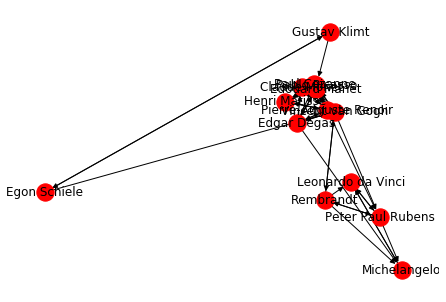

In [21]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos = embedding, node_color = 'r', labels = names)

**Metrics**

In [22]:
skn.embedding.dot_modularity(adjacency, embedding)

0.21884985511884975

## Bipartite graphs

**Loading**

In [23]:
biadjacency, movies, actors = skn.toy_graphs.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Embedding**

In [24]:
svd = skn.embedding.SVD()
svd.fit(biadjacency)

SVD(embedding_dimension=2, weights='degree', feature_weights='degree', regularization=0.01, energy_scaling=True, solver=LanczosSVD())

In [25]:
embedding = svd.embedding_
embedding.shape

(15, 2)

In [26]:
coembedding = svd.coembedding_
coembedding.shape

(16, 2)

**Visualization**

In [27]:
from networkx import from_scipy_sparse_matrix, draw

In [28]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [29]:
graph = from_scipy_sparse_matrix(adjacency)

In [30]:
n,p = biadjacency.shape
pos = {i: embedding[i,:] for i in range(n)} 
pos.update({n + i: coembedding[i,:] for i in range(p)})

In [31]:
colors = n * ['r'] + p * ['b']

In [32]:
names = movies
names.update({n + i: actors[i] for i in actors})

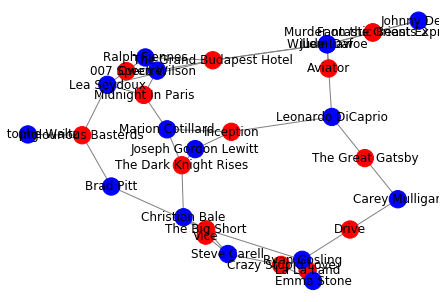

In [33]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color=colors, labels = names, edge_color = 'grey')